# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [16]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

#import importlib
#importlib.reload(main)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [9]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
295 µs ± 47.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 125.86 MiB, increment: 0.00 MiB


SIZE:  1000
Timing: 
22 ms ± 696 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 125.86 MiB, increment: 0.00 MiB


SIZE:  10000
Timing: 
2.33 s ± 81.8 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2338.64 MiB, increment: 2212.75 MiB




***Zadanie 1.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


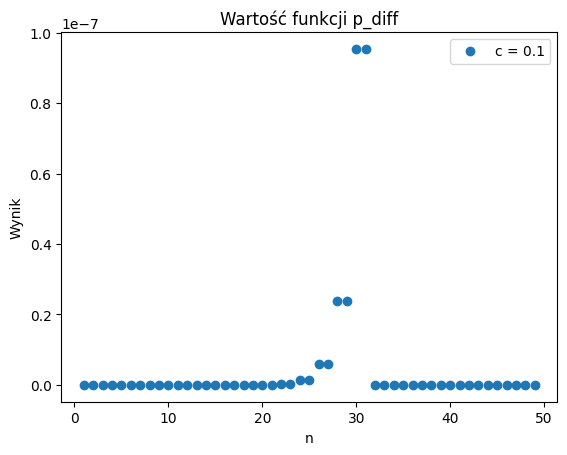

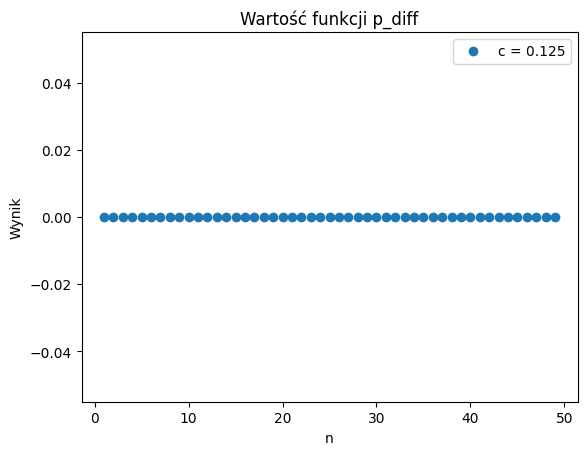

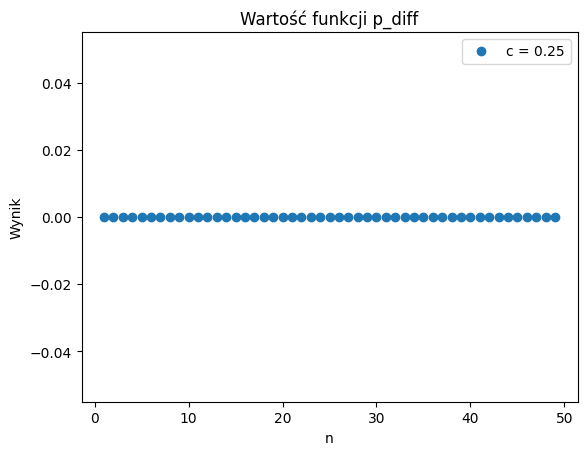

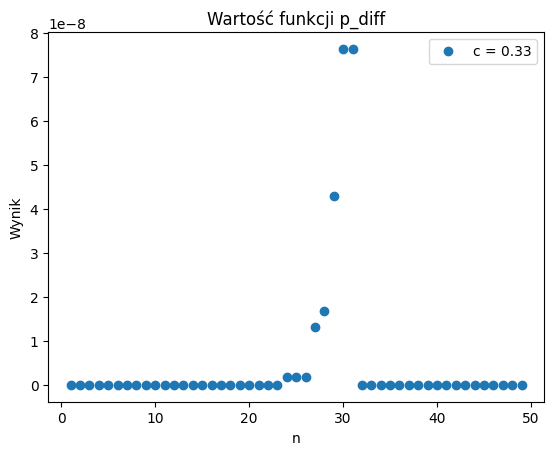

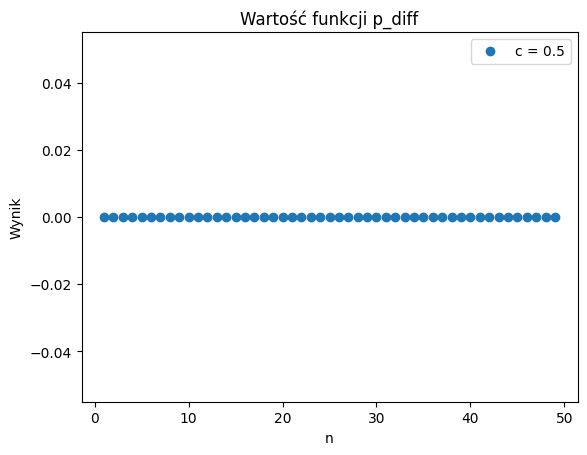

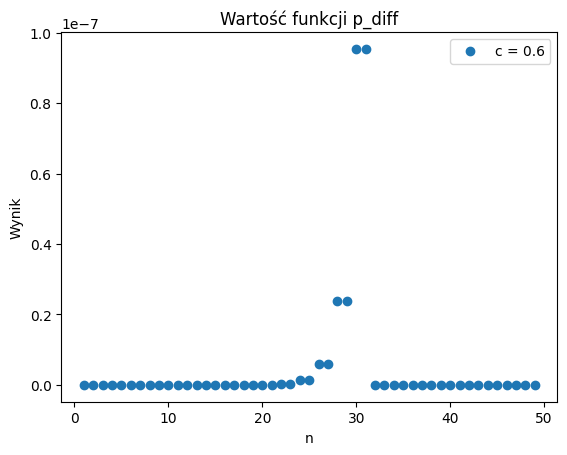

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def p_diff(n: int, c: float) -> float:
    b = 2 ** n
    P1 = b - b + c
    P2 = b + c - b
    P = abs(P1 - P2)
    return P
n = np.arange (1,50,1)
c = [0.1,0.125, 0.25, 0.33, 0.5, 0.6]
for i in c:
    tab = []
    for j in n:
        tab.append(p_diff(j,i))
    plt.figure()
    plt.plot(n, tab, linestyle ='none', marker = 'o',label ='c = ' + str(i))
    plt.xlabel('n')
    plt.ylabel('Wynik')
    plt.legend()
    plt.title('Wartość funkcji p_diff')
plt.show()


1. W każdym przypadku powinniśmy otrzymać wynik równy 0
2. Skończoną reprezentację mają liczby które są ujemną potęgą dwójki czyli np. 0.125, 0.25, 0.
3. Wyniki różnią się ze względu na zaokrąlenie nieskończonych reprezentacji liczb, które nie są ujemną potęgą dwójki
4. Jest to błąd zaokrąglenia
5. Poprzez wybranie liczb o skończonej reprezentacji (ujemnych potęg dwójki)

***Zadanie 2.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import Union, List, Tuple

def exponential(x: Union[int, float], n: int) -> float:
    exp_aprox = 0
    for i in range (n):
        exp_aprox += (1/math.factorial(i))*x**i
    if x > 0 and i > 0: 
        return exp_aprox
    else:
        return 'Nan'
print (exponential(2,20))
print (np.e**2)


7.3890560989301735
7.3890560989306495


1. Jest to błąd metody. Występuje gdyż liczba e ma nieskończone rozwinięcie, a my używamy skończonej liczby powtórzeń pętli.
2. Im większe n tym błąd jest mniejszy. Błąd wynosiłby zero, gdyby n dążyło do nieskończoności. Nie jesteśmy w stanie tego zrobić niestety, dlatego musimy się posłużyć skończoną liczbą powtórzeń funkcji, co daje wystarczająco duże przybliżenie.

***Zadania 3.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

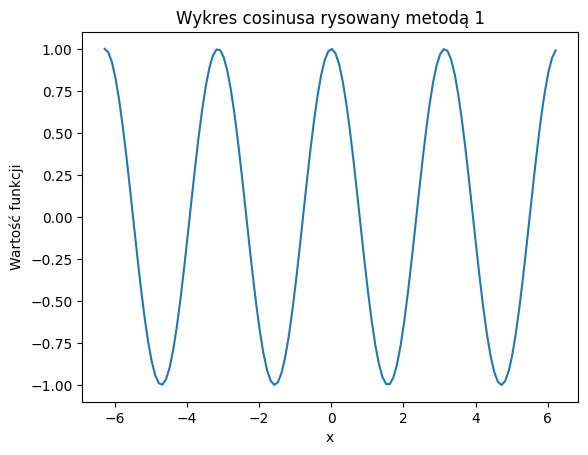

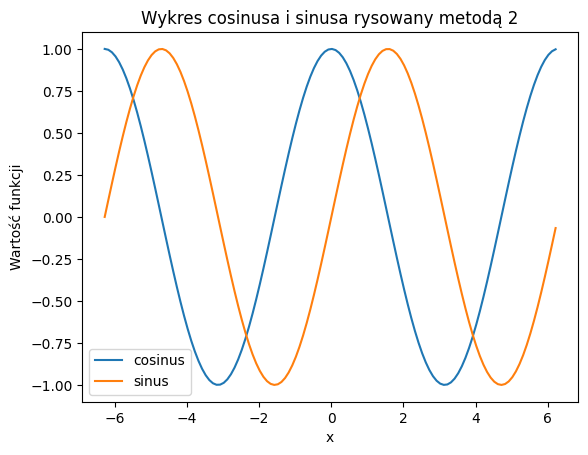

In [12]:
def coskx1(k: int, x: Union[int, float]) -> float:
    if k < 0:
        return 'Nan'
    if k == 0:
        return 1
    if k == 1:
        return np.cos(x)
    else:
        return 2*np.cos(x) * coskx1(k-1,x) - coskx1(k-2,x)

def coskx2(k: int, x: Union[int, float]) -> Tuple[float, float]:
    if k == 0:
        return [1,0]
    if k == 1:
        return [np.cos(x),np.sin(x)]
    else:
        def sinkx (k : int, x:Union[int,float]) -> float:
            if k == 1:
                return np.sin(x)
            else:
                return np.sin(x)*coskx2(k-1,x)[0] + np.cos(x) * sinkx(k-1,x)
        return [np.cos(x)*coskx2(k-1,x)[0] - np.sin(x) * sinkx(k-1,x), sinkx(k,x)]

x = np.arange(-2*np.pi, 2*np.pi, 0.1)
tab = []
for i in x:
    tab.append(coskx1(2,i))
plt.figure()
plt.plot (x,tab)
plt.title("Wykres cosinusa rysowany metodą 1")
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.show()

tab = []
for i in x:
    tab.append(coskx2(1,i))
plt.figure()
plt.title("Wykres cosinusa i sinusa rysowany metodą 2")
plt.plot (x,tab, label = ['cosinus','sinus'])
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.show()

Funkcja rekurencyjna jest świetnym rozwiązaniem gdy mamy do czynienia z niewielkim k. Przy większych k funkcje rekurencyjne stają się coraz mniej skuteczne, potrzebują coraz więcej czasu.

***Zadanie 4.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 2 w zależności od różnych wartości $N$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby $e$ w zależności od $N$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby $e$ od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

N:  1
The slowest run took 5.49 times longer than the fastest. This could mean that an intermediate result is being cached.
1.37 µs ± 1.29 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 158.37 MiB, increment: 0.00 MiB
---------------------------------------------
N:  2
1.68 µs ± 390 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 158.37 MiB, increment: 0.00 MiB
---------------------------------------------
N:  3
850 ns ± 192 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 158.37 MiB, increment: 0.00 MiB
---------------------------------------------
N:  4
1.02 µs ± 214 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 158.37 MiB, increment: 0.00 MiB
---------------------------------------------
N:  5
1.07 µs ± 178 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 158.37 MiB, increment: 0.00 MiB
---

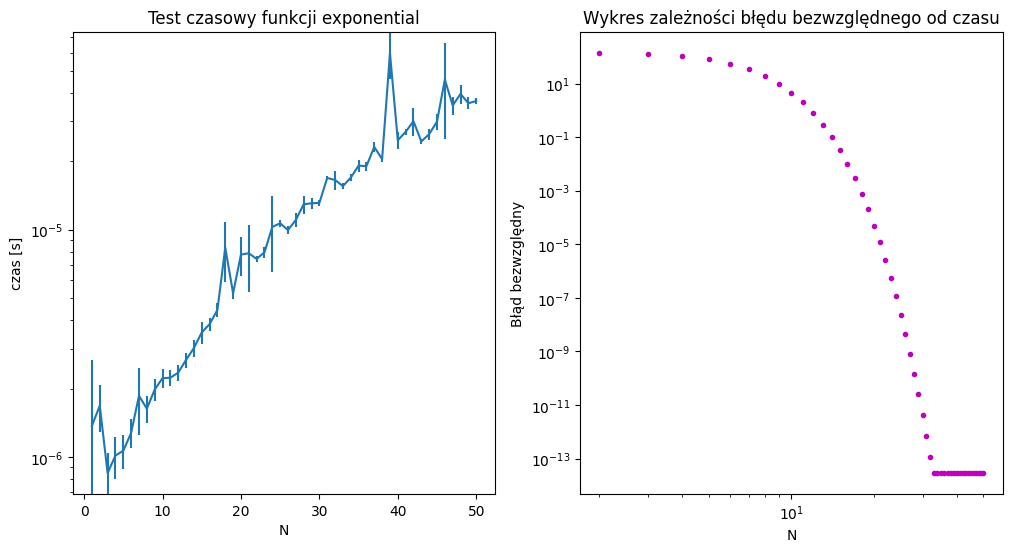

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, List
import main

def calculate_error(v: Union[int, float, List, np.ndarray], v_aprox: Union[int, float, List, np.ndarray]) -> Union:
    try:
        return abs(np.array(v_aprox) - np.array(v))
    except (ValueError, TypeError):
        return np.NaN

def run_experiment(x: float, max_times: int) -> Tuple[List[int], np.ndarray, np.ndarray, np.ndarray]:
    npexp = np.exp(x)
    n = list(range(1, max_times + 1))
    time_avg = np.zeros(max_times)
    time_std_dev = np.zeros(max_times)
    peak_mem = np.zeros(max_times)
    abs_err = np.zeros(max_times)

    for i in range(len(n)):
        print('N: ', n[i])
        
        saved_timing = %timeit -r 5 -n 10 -o main.exponential(x, n[i])
        time_avg[i] = saved_timing.average
        time_std_dev[i] = saved_timing.stdev
    
        print('Zużycie pamięci: ')
        saved_mem = %memit -o main.exponential(x, n[i])
        peak_mem[i] = float(saved_mem.mem_usage.copy()[0])
        print('---------------------------------------------')
        abs_err[i] = calculate_error(npexp, main.exponential(x, n[i]))

    return n, time_avg, time_std_dev, abs_err

def plot_results(n: List[int], time_avg: np.ndarray, time_std_dev: np.ndarray, abs_err: np.ndarray):
    fig1, (time, error) = plt.subplots(1, 2, figsize=(12, 6))
    time.set_title("Test czasowy funkcji exponential")
    time.set_yscale("log")
    time.set_ylabel("czas [s]")
    time.set_xlabel("N")
    time.errorbar(n, time_avg, yerr=time_std_dev)

    error.plot(n, abs_err, 'm.')
    error.set_xlabel("N")
    error.set_ylabel("Błąd bezwzględny")
    error.set_title('Wykres zależności błędu bezwzględnego od czasu')
    error.set_yscale("log")
    error.set_xscale("log")

    plt.show()

x_value = 5
max_experiment_times = 50
n_values, avg_times, std_dev_times, errors = run_experiment(x_value, max_experiment_times)
plot_results(n_values, avg_times, std_dev_times, errors)


Czas wykonywania funkcji expotential wzrasta wraz z liczbą N, natomiast błąd bezwzględny maleje.

Wnioski:
Na tych ćwiczeniach przećwiczyłem wyznaczanie błędu w obliczeniach, badanie czasu wykonania funkcji za pomocą timeit, oraz zużytej pamięci przy pomocy memit. Wyniki przedstawiłem również na wykresach. Z moich obliczeń wynika, że wraz ze wzrostem N - czs wykonywania funkcji wzrasta, a błąd bezwzględny maleje. Pamięć pozostaje taka sama we wszystkich wypadkach.